In [3]:
from estiminator import our_method
from evaluator import *
from tqdm import tqdm

In [4]:
# 先测试一下our_method
n_features=500
n_packs=21
n_samples=100
s=20
L=10

alg = our_method(n_features)

samples_packs=[]
# 设定超参数：各模型回归系数、特征间的协方差矩阵、噪声的均值与方差
# 长度为n_features, 其中前s个为非零回归系数，后n_features-s个为零
coef_true = np.zeros(n_features)
coef_true[:s] = 0.3
#生成样本
for i in range(n_packs):
    cov = np.eye(n_features)
    noise_mean = 0
    noise_var = 0.1
    X, y = coef_gen(coef_true, cov, noise_mean+0.01*(19-i), noise_var+0.005*(19-i), n_samples)
    samples_packs.append(samples_pack(X, y))

In [3]:
#模型拟合
pre_params,delta,v,times= alg.fit(samples_packs,s,L)
#计算coef_true与pre_params的SSE
SSE = np.sum((coef_true - pre_params)**2)

100%|██████████| 10/10 [00:15<00:00,  1.52s/it]


In [3]:
v

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 1.])

In [4]:
SSE

0.031044023909652087

In [5]:
pre_params

array([ 2.92867136e-01,  3.00231541e-01,  2.97955385e-01,  2.94077605e-01,
        2.97163015e-01,  2.94280034e-01,  2.85111905e-01,  2.93302329e-01,
        3.04238178e-01,  2.90226591e-01,  2.89845231e-01,  2.86083579e-01,
        2.96114242e-01,  2.78897362e-01,  3.05426505e-01,  3.05325276e-01,
        2.91586663e-01,  2.94569209e-01,  3.02877303e-01,  3.08177631e-01,
       -1.10370335e-02, -9.04856675e-04,  6.60670102e-03,  8.98152023e-03,
       -9.93400231e-03,  9.41754920e-03, -2.96094022e-03, -5.77055614e-03,
       -1.75529240e-03, -4.04057755e-03, -4.58245735e-03, -5.93637326e-03,
       -5.43774441e-03, -1.96098796e-03,  3.18126141e-03, -4.94750107e-03,
        4.89487997e-03,  5.87078272e-03, -9.49291407e-03, -1.56386248e-03,
       -8.60095232e-03, -8.82377458e-03, -2.58537152e-03, -1.12393450e-02,
       -6.08037047e-03,  5.79567657e-03, -4.22397012e-03,  4.39317558e-04,
        1.20997619e-03, -6.21192929e-04, -4.65356182e-03,  7.46083671e-03,
       -8.96959111e-03, -

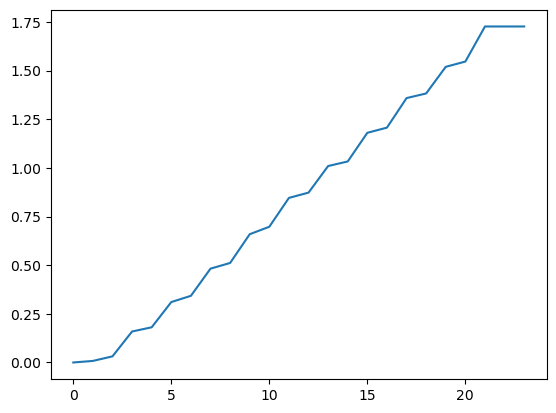

In [3]:
import matplotlib.pyplot as plt
plt.plot(times)

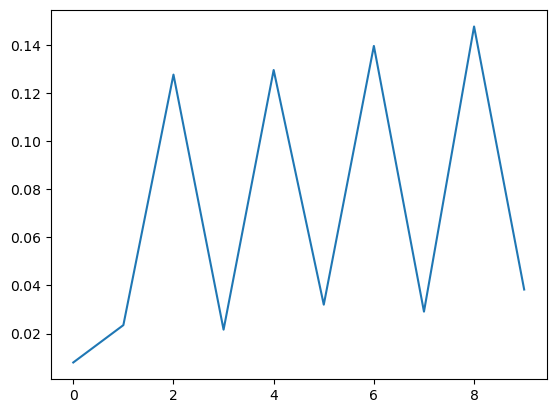

In [6]:
#对times做一阶差分
times_diff = np.diff(times)
plt.plot(times_diff[:10])

In [7]:
#进行一次简单的岭回归估计试一下
X0=samples_packs[0].X
y0=samples_packs[0].y
SSE_min=10000
lamb_min=0
#lambda从0.01到1，每次增加0.01
for lamb in tqdm(np.arange(0.01,1,0.01)):
    pre_params_ridge = np.linalg.inv(X0.T.dot(X0)+lamb*np.eye(n_features)).dot(X0.T).dot(y0)
    SSE = np.sum((coef_true - pre_params_ridge)**2)
    if SSE<SSE_min:
        SSE_min=SSE
        lamb_min=lamb
lamb_min

100%|██████████| 99/99 [00:00<00:00, 131.79it/s]


0.99

In [8]:
SSE_min

1.3769144457648437

In [9]:
#用lasso估计一下
from sklearn.linear_model import Lasso
clf = Lasso(alpha=0.1)
clf.fit(X0, y0)
pre_params_lasso = clf.coef_
SSE = np.sum((coef_true - pre_params_lasso)**2)
SSE

0.2498059334568233

In [12]:
pre_params_lasso

array([ 0.13938883,  0.12554378,  0.03941406,  0.19043466,  0.21680263,
        0.07340766,  0.        ,  0.13905383,  0.09362895,  0.06896145,
        0.08812273,  0.05386274,  0.23390707,  0.02670791,  0.17466763,
        0.22259189,  0.25835998,  0.07509355,  0.21570765,  0.13870639,
        0.        , -0.        ,  0.        , -0.        , -0.        ,
        0.        , -0.        , -0.        ,  0.        ,  0.        ,
       -0.        , -0.        , -0.        ,  0.        ,  0.        ,
       -0.        ,  0.        ,  0.        , -0.        ,  0.        ,
        0.        , -0.        ,  0.        ,  0.        , -0.        ,
       -0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.        , -0.        ,  0.        , -0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.        ,  0.        ,
       -0.        , -0.        , -0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.00172871,  0.        , -0.  

In [6]:
from estiminator import trans_lasso

n_features=500
n_packs=21
n_samples=100
s=20
L=10

alg = trans_lasso(n_features)

#模型拟合
pre_params3,GL= alg.fit(samples_packs,s,L)
#计算coef_true与pre_params的SSE
SSE2 = np.sum((coef_true - pre_params3)**2)

In [7]:
pre_params3

array([ 0.        , -0.        , -0.        ,  0.12606547,  0.        ,
        0.        ,  0.12015216,  0.        ,  0.        ,  0.        ,
        0.00342479,  0.17908002,  0.        ,  0.        ,  0.        ,
        0.11590221,  0.20412085, -0.        ,  0.07106082,  0.03646165,
       -0.        , -0.        ,  0.        , -0.        , -0.        ,
       -0.        , -0.        ,  0.        , -0.        ,  0.        ,
       -0.        , -0.        , -0.        , -0.        ,  0.        ,
       -0.        ,  0.        ,  0.        ,  0.        , -0.        ,
       -0.        ,  0.        , -0.        , -0.        , -0.        ,
        0.        , -0.        , -0.        , -0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.00710367, -0.        ,
       -0.        , -0.        , -0.        ,  0.        ,  0.        ,
       -0.        , -0.        , -0.        ,  0.        ,  0.        ,
       -0.        , -0.        , -0.        , -0.        ,  0.  

In [8]:
SSE2

1.4466627776092067

In [9]:
GL

array([ 9,  3, 14,  7, 19, 12, 11, 16, 18,  0], dtype=int64)